<a href="https://colab.research.google.com/github/votrannhatquang/AI-s-ng-th-7/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [2]:
x_train.shape



(50000, 32, 32, 3)

In [3]:
y_train.shape

(50000, 1)

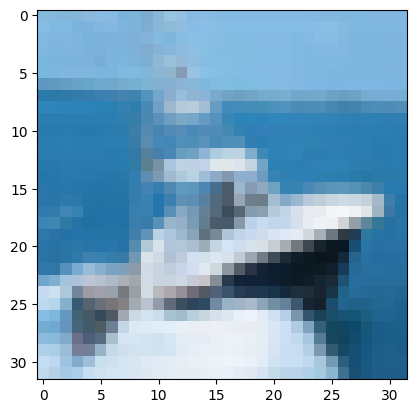

so: [8]


In [4]:
import matplotlib.pyplot as plt 
digit= x_train[8]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('so:',y_train[8])

<ipython-input-5-e40275237779>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


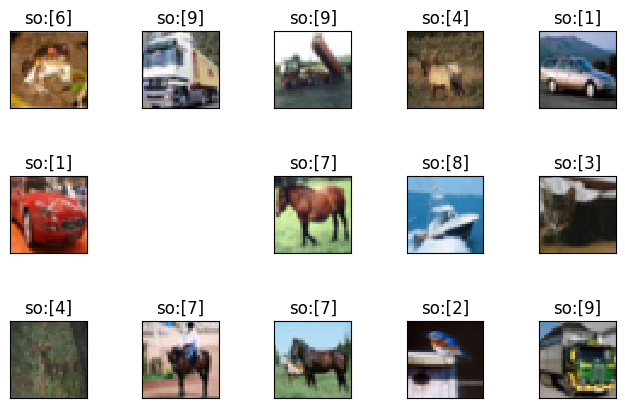

In [5]:
for i in range (15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('so:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [6]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(3000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(1000,activation='softmax'))
model.add(Dense(500,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 500)               500500    
                                                                 
 dense_3 (Dense)             (None, 10)                5010      
                                                                 
Total params: 12,725,510
Trainable params: 12,725,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
X=x_test
Y=y_test

In [8]:
x_train= x_train.reshape(50000,32*32*3)
x_train=x_train.astype('float32')/255
x_test= x_test.reshape(10000,32*32*3)
x_test= x_test.astype('float32')/255

In [9]:
x_test.shape

(10000, 3072)

In [10]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [11]:
y_test.shape

(10000, 10)

In [12]:
y_train.shape

(50000, 10)

In [13]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size = 128)
test_loss, test_acc=model.evaluate(x_test, y_test)
print('Mất mát:',test_loss)
print('Độ chính xác:',test_acc)

Epoch 1/10
391/391 [==============================] - 10s 6ms/step - loss: 2.1684 - accuracy: 0.1624
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 2.0254 - accuracy: 0.2384
Epoch 3/10
391/391 [==============================] - 3s 7ms/step - loss: 1.9265 - accuracy: 0.2952
Epoch 4/10
391/391 [==============================] - 2s 6ms/step - loss: 1.8298 - accuracy: 0.3386
Epoch 5/10
391/391 [==============================] - 2s 5ms/step - loss: 1.7543 - accuracy: 0.3695
Epoch 6/10
391/391 [==============================] - 2s 5ms/step - loss: 1.7025 - accuracy: 0.3886
Epoch 7/10
391/391 [==============================] - 2s 6ms/step - loss: 1.6543 - accuracy: 0.4076
Epoch 8/10
391/391 [==============================] - 2s 5ms/step - loss: 1.6098 - accuracy: 0.4258
Epoch 9/10
391/391 [==============================] - 3s 6ms/step - loss: 1.5778 - accuracy: 0.4398
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 1.6704 - accuracy: 0.403

In [14]:
model.save('test1.h5')

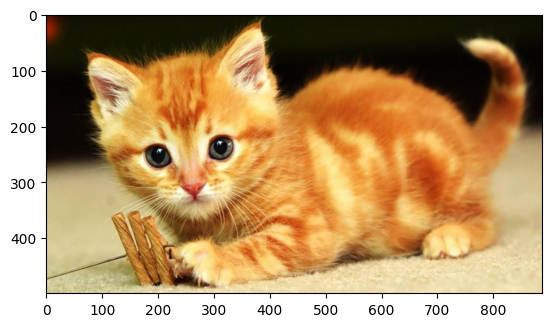

In [16]:
img = plt.imread('/content/drive/MyDrive/meo_vang3.jpg')
plt.imshow(img)

1/1 [==============================] - 0s 124ms/step


array([6])

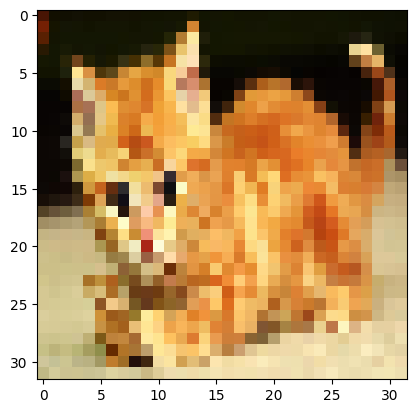

In [17]:
import numpy as np
from keras.utils import load_img, img_to_array
img=load_img('/content/drive/MyDrive/meo_vang3.jpg', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis =1)

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
